<a href="https://colab.research.google.com/github/BatyrlanBakytbekov/deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deep learning systems
# made by: Batyrlan Bakytbekov
# Deep learning with Convolutional Neural Network

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# print out the shape
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label: 0


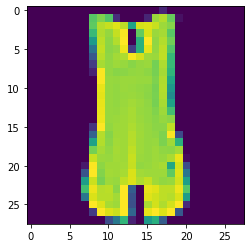

In [ ]:
# visualize and print out by index
index = 4

plt.imshow(train_images[index]);
print(f"Label: {train_labels[index]}")

In [ ]:
# Normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# set model structure of neural network
import tensorflow as tf
from keras.models import Sequential
from keras import layers

np.random.seed(1337)


num_filters = 8
filter_size = 3
pool_size = 2

model = keras.Sequential(
    [
        layers.Conv2D(num_filters, filter_size, input_shape=train_images[0].shape),
        layers.Conv2D(num_filters, filter_size),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation = "softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                73792     
                                                        

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
#train neural network
from tensorflow.keras.utils import to_categorical
import datetime

model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

# Tensorboard logs dir
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  validation_data=(test_images, to_categorical(test_labels)),
  callbacks=[tensorboard_callback]
);

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.1021 - accuracy: 0.7980 - val_loss: 0.0741 - val_accuracy: 0.8517
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0723 - accuracy: 0.8561 - val_loss: 0.0638 - val_accuracy: 0.8731
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0642 - accuracy: 0.8726 - val_loss: 0.0582 - val_accuracy: 0.8838
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0595 - accuracy: 0.8832 - val_loss: 0.0548 - val_accuracy: 0.8910
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0561 - accuracy: 0.8899 - val_loss: 0.0524 - val_accuracy: 0.8950


In [ ]:
%load_ext tensorboard

In [ ]:
# Evaluation of testing accuracy and loss
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
print("Test accuracy: ", test_acc)
print("Test loss", test_loss)

Test accuracy:  0.8949999809265137
Test loss 0.05244035646319389


313/313 [==============================] - 4s 13ms/step


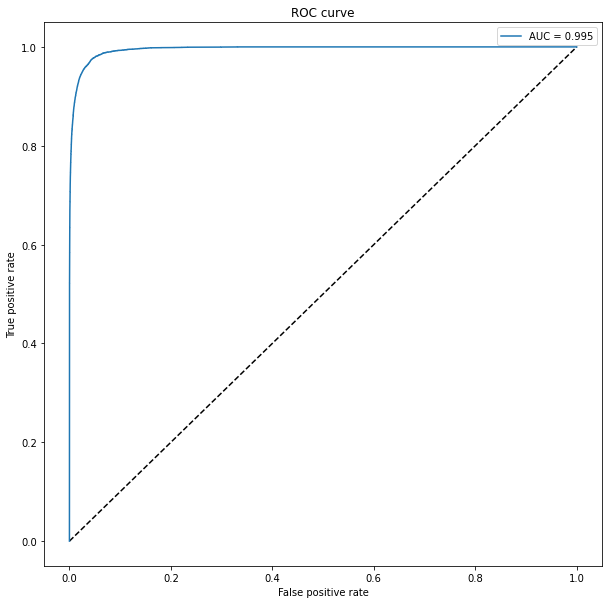

In [ ]:
# ROC evaluation
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

Y_pred = model.predict(test_images)
fpr, tpr, threshold = roc_curve(to_categorical(test_labels).ravel(), Y_pred.ravel())

plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
# MAE evaluation
mean_loss = np.mean(test_loss)
mean_mae = np.mean(test_acc)

print(f"Loss evaluation = {mean_loss}")
print(f"MAE evaluation = {mean_mae}")

Loss evaluation = 0.05244035646319389
MAE evaluation = 0.8949999809265137
